##### **MNIST Handwritten digit classification using deep learning (Neural Network)**

##### Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

##### Loading the MNIST data from keras.datasets

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [7]:
type(X_train)

numpy.ndarray

In [8]:
# shpe of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data --> 60,000 images  
Test data --> 10,000 images  
image dimension --> 28 x 28  
Grayscale image --> 1 channel

In [10]:
# Print the 10th image from training data
print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [11]:
# Checking the shape of the image
print(X_train[9].shape)

(28, 28)


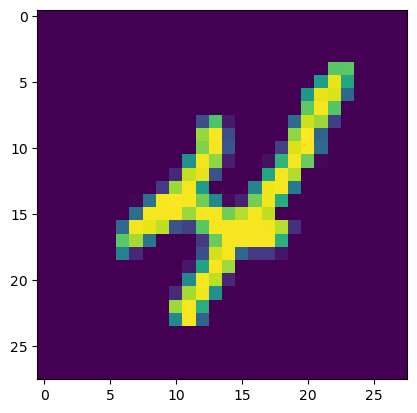

The target label is: 4


In [12]:
# Displaying the image
img = X_train[9]

plt.imshow(img)
plt.show()

# Print lable of this image
print('The target label is:', Y_train[9])

In [13]:
# Image labels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [14]:
# Unique value in Y_train
print(np.unique(Y_train))

# Unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


##### we can use this label as it is or we can convert the label as one hot encoding

##### All the images have the same dimension in this dataset, if not we have to resize all the images in common dimension

In [17]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

In [18]:
# Print the 10th image from training data
print(X_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

##### Building the Neural Network

In [20]:
# Setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [21]:
# Complining the neural network

model.compile(optimizer='Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
# Training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8469 - loss: 0.5266
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9540 - loss: 0.1571
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1100
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0836
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9824 - loss: 0.0553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0459
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0393
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0336
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.0290


Training data accuracy is 99.05%

##### Accuracy on test data

In [25]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1170
0.9714999794960022


Test data accuracy is 96.79%

In [27]:
print(X_test.shape)

(10000, 28, 28)


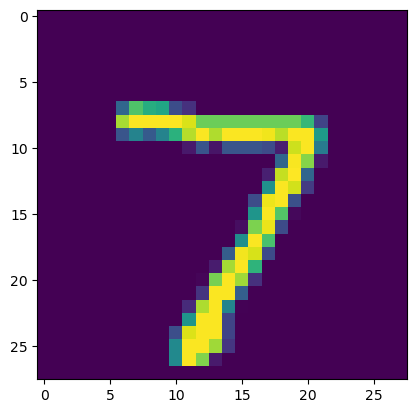

In [28]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [29]:
print(Y_test[0])

7


In [30]:
Y_prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
print(Y_prediction.shape)

(10000, 10)


In [32]:
print(Y_prediction[0])

[1.5907854e-01 1.5837188e-04 3.6734295e-01 9.8271275e-01 1.6521510e-06
 1.1500521e-02 4.3004613e-09 9.9999499e-01 5.2448982e-01 7.9840130e-01]


model.predict() gives the prediction probability of the each class for that data point

In [34]:
# Converting the prediction probability to the class label
label_for_first_image = np.argmax(Y_prediction[0])
print(label_for_first_image)

7
